包括内容：矩阵运算，portfolios theory【sharp ratio, mve】, minimize函数，

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import minimize

矩阵运算:

矩阵转置：原矩阵的行列对调。

矩阵加减法，两个矩阵的大小必须一致。

矩阵乘法，第一个矩阵的列数必须和第二个矩阵的行数相同，原因下面会讲。

In [3]:
x=np.array([[1,1],[2,2],[3,3]])
print(x)
print("After transposed")
print(x.T)

[[1 1]
 [2 2]
 [3 3]]
After transposed
[[1 2 3]
 [1 2 3]]


In [4]:
A=np.array([[1,2],[3,4],[5,6]])
B=np.array([[1,1],[1,1],[1,2]])
A+B #3*2 + 3*2

array([[2, 3],
       [4, 5],
       [6, 8]])

In [5]:
C=np.array([[1,2],[3,4],[5,6]])
D=np.array([[1,1],[1,1]])
C+D #3*2 + 2*2 

ValueError: operands could not be broadcast together with shapes (3,2) (2,2) 

In [18]:
w=np.array([0.1,0.4,0.5])
R=np.array([0.05,0.06,0.07]).T
w @ R #(1*3) @ (3*1)

0.064

有个非常tricky的地方，就是（3\*1）矩阵。上面那个例子中，R本来应该是(3\*1)矩阵，然而python给出，R是一个(3,)矩阵。而这个时候，这样的矩阵其实是非常灵活的。python会自动将这样的矩阵转化成适合计算的shape。原则上而言，一个列矩阵乘以一个列矩阵，在数学上是没有任何意义的，但是在python编码的时候可以简写。它会默认转换成行乘以列矩阵。

In [19]:
print(R)
print(R.shape)
print(R.T)
print(R.T.shape)

[0.05 0.06 0.07]
(3,)
[0.05 0.06 0.07]
(3,)


In [20]:
w @ R.T #(1*3) * (3,)

0.064

In [21]:
w + R #(1*3) + (3,)

array([0.15, 0.46, 0.57])

In [22]:
R @ A #(3*) * (3*2)

array([0.58, 0.76])

但是比较奇葩的事情来了，按理来说(1,)\*(3,) 的运算应该是成立的，然而并不能跑出来。但是这个无所谓，因为(1,)的矩阵相当于一个常数。

In [23]:
a=np.array([1])
b=np.array([1,2,3])
a @ b

ValueError: shapes (1,) and (3,) not aligned: 1 (dim 0) != 3 (dim 0)

矩阵的乘法，简单来说就是“行×列”。对于结果矩阵中的第X行第Y列的元素，就是第一个矩阵的第X行，和第二个矩阵中的第Y列，对应的乘积的总和。用数字表示就是，对于一个矩阵乘法$A @ B = C$， C矩阵中的每一个元素为：
$$C_{i,j}=\sum_k{A_{i,k}*B_{k,j}}=(A_{i,1}*B_{1,j}+A_{i,2}*B_{2,j}+...+A_{i,n}*B_{n,j})$$
所以，如果第一个矩阵的列数，也就是每一行的元素数量，与后一个矩阵的行数，也就是每一列的元素数量，也就是上面算式中的n，不想等的话，上面这个算式就不成立，所以矩阵乘法会有以上要求。换句话说，如果我们说一个矩阵的大小定义为(行数*列数),那么矩阵乘法就必须满足$(i*j) @ (j*k)$的格式。
简单来说，如果A是1*n，B是n*1的矩阵，那么C也就是一个1*1矩阵,或者说一个数，
$$C=c=A_1*B_1+A_2*B_2+...+A_n*B_n$$
如果A是投资组合中每个资产的权重，B是每个资产的回报，那么C也就是投资组合的回报。 
$$C=r_p=w_1*r_1+w_2*r_2+...+w_n*r_n$$
如果无法理解就不要理解，记住就好了。

矩阵的乘法，简单来说就是“行×列”。对于结果矩阵中的第X行第Y列的元素，就是第一个矩阵的第X行，和第二个矩阵中的第Y列，对应的乘积的总和。用数字表示就是，对于一个矩阵乘法$A @ B = C$， C矩阵中的每一个元素为：
$$C_{i,j}=\sum_k{A_{i,k}*B_{k,j}}=(A_{i,1}*B_{1,j}+A_{i,2}*B_{2,j}+...+A_{i,n}*B_{n,j})$$
所以，如果第一个矩阵的列数，也就是每一行的元素数量，与后一个矩阵的行数，也就是每一列的元素数量，也就是上面算式中的n，不想等的话，上面这个算式就不成立，所以矩阵乘法会有以上要求。换句话说，如果我们说一个矩阵的大小定义为(行数*列数),那么矩阵乘法就必须满足$(i*j) @ (j*k)$的格式。
简单来说，如果A是1*n，B是n*1的矩阵，那么C也就是一个1*1矩阵,或者说一个数，
$$C=c=A_1*B_1+A_2*B_2+...+A_n*B_n$$
如果A是投资组合中每个资产的权重，B是每个资产的回报，那么C也就是投资组合的回报。 
$$C=r_p=w_1*r_1+w_2*r_2+...+w_n*r_n$$
如果无法理解就不要理解，记住就好了。

矩阵的乘法，简单来说就是“行×列”。对于结果矩阵中的第X行第Y列的元素，就是第一个矩阵的第X行，和第二个矩阵中的第Y列，对应的乘积的总和。用数字表示就是，对于一个矩阵乘法$A @ B = C$， C矩阵中的每一个元素为：
$$C_{i,j}=\sum_k{A_{i,k}*B_{k,j}}=(A_{i,1}*B_{1,j}+A_{i,2}*B_{2,j}+...+A_{i,n}*B_{n,j})$$
所以，如果第一个矩阵的列数，也就是每一行的元素数量，与后一个矩阵的行数，也就是每一列的元素数量，也就是上面算式中的n，不想等的话，上面这个算式就不成立，所以矩阵乘法会有以上要求。换句话说，如果我们说一个矩阵的大小定义为(行数*列数),那么矩阵乘法就必须满足$(i*j) @ (j*k)$的格式。
简单来说，如果A是1*n，B是n*1的矩阵，那么C也就是一个1*1矩阵,或者说一个数，
$$C=c=A_1*B_1+A_2*B_2+...+A_n*B_n$$
如果A是投资组合中每个资产的权重，B是每个资产的回报，那么C也就是投资组合的回报。 
$$C=r_p=w_1*r_1+w_2*r_2+...+w_n*r_n$$
如果无法理解就不要理解，记住就好了。

In [24]:
url = "https://www.dropbox.com/s/9346pp2iu5prv8s/MonthlyFactors.csv?dl=1"
Factors = pd.read_csv(url,index_col=0, parse_dates=True,na_values=-99)/100
Factors.head()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

因为有部分同学没有学过Portfolio Theory和CAPM，这里我简单说一下，具体还是去看课件。  
投资学中，每个资产有个回报率r，这个回报率可能会随着时间变化。因为变化，所以存在方差/标准差，标准差也叫波动率(volatility)。  
一般我们认为，对于risk-averse风险厌恶的投资者，同样的回报下，风险越小越好；同样的风险下，回报越大越好。  
对于一堆有风险的资产，我们可以通过不同权重的组合，获得一定限制下的各种回报和对应的风险组合。  
我们选出在不同回报的情况下，最小风险，也就是最小标准差的投资组合，组成MVF(Mean-Variance Frontier),得到一条曲线，这条曲线是只投资风险资产的最优投资选项。  
在此基础上我们引入sharp ratio，意义为每一单位风险所有的高于无风险利率的回报：
$$SP=\frac{r_p-r_f}{\sigma_p}$$
显然，SP越大越好，在MVF上SP最大的一点，叫做MVE(Mean-Variance Efficient Portfolio)，或Tangency Portfolio。 
把MVF和Risk free资产(RF)连上，就组成CML(Capital Market Line),这条线是MVE与RF的所有组合。

不清楚原理的，至少先把定义弄清楚，不然连代码都看不懂。

好的，接下来是玄学阶段，理解不来就不要理解，直接背结果，反正期中考半开卷。
已知一个portfolio里面有n个资产，每个资产的权重记录在矩阵$w$中：
$$w=[w_1,w_2,w_3,...,w_n]$$


In [25]:
w=np.ones(3)/3 #这个只是最开始的假设，ones函数生成所需长度的(这里是3)的一个列矩阵，里面元素都是1，zeros函数同理
w              #再除以三，相当于所有资产平均分配，在除以三，相当于所有资产平均分配

array([0.33333333, 0.33333333, 0.33333333])

每个资产的回报记录在矩阵$R$中：
$$R=[r_1, r_2, r_3,...,r_n]$$
每个资产的超RF回报记录在矩阵$Re$中:
$$R^e=[r_1-r_f,r_2-r_f,r_3-r_f,...,r_n-r_f]=R-rf$$

In [26]:
R=Factors.iloc[:,1:4].mean()
Re=R
Rf=Factors.RF.mean()
Re.MKT=Re.MKT-Rf #这一个例子比较特殊，SMB和HML不需要减Rf,因为他们不是一个资产的回报率，而是回报率的差。
R=R.values
Re=Re.values                    #注意这里需要用values转变一下数据类型，不然不能做矩阵乘法
Re

array([0.00656722, 0.00210082, 0.00388123])

每个资产间的Cov记录在矩阵$Cov$中：#Cov矩阵太难写啦，不写了。  

In [27]:
Cov=Factors.iloc[:,1:4].cov()
Cov

,MKT,SMB,HML
MKT,0.002857,0.000543,0.000452
SMB,0.000543,0.001028,0.000138
HML,0.000452,0.000138,0.001225


那么：
portfolio的return等于 $$ R_p = w.T@R $$
portfolio的超RF return等于 $$R^e_p = w.T @ Re $$

In [28]:
Rep= w @ R     #因为w是列矩阵，正如上面所说，加不加.T都一样。
Rep            #w是平均分配三个子资产，所以这个超额回报是平均分配三个资产的投资组合的超额回报

0.00418308913308913

portfolio的Variance等于
$$Var(R^e_p)=\sigma^2_{p}=w.T @ Cov @ w$$


In [29]:
Varp = w @ Cov @ w
Varp

0.0008193571666840135

Tengency portfolio中，每个资产的权重是这么计算的：
$$w=(Cov)^{-1} @ Re$$
$$w^*=\frac{w}{w.sum()}$$
矩阵有乘法，但是没有除法，原因是同一个矩阵A乘以两个不同的矩阵B或C都有可能得到同一个结果。所以矩阵有逆矩阵，
$$Cov @ (Cov)^{-1} = I$$
这里的$I$,相当于我们数学中的1，任何矩阵乘以矩阵$I$，都等于其本身。
所以你可以理解为这里是
$$w=\frac{Re}{Cov}$$
当然，这个直接算是算不了的。所以要用逆矩阵。

In [30]:
Covinv=np.linalg.inv(Cov) #求逆矩阵
w = Covinv @ Re
wmve = w/w.sum()            #w.sum()是w中所有元素的总和，这一步是为了让w.sum()=1
print(wmve)
print(wmve.sum())

[0.35445311 0.15798441 0.48756248]
1.0


Tnagency Portfolio的回报是
$$R^e_{mve}=w.T @ Re$$
$$R_{mve}=R^e_{mve}+Rf$$

In [31]:
Remve = wmve.T @ Re
Rmve = Remve + Rf
print(Remve)
print(Rmve)

0.004552008362974329
0.007317576128542103


Tnagency Portfolio的标准差是
$$\sigma_{mve}=\sqrt{w.T @ Cov @ w}$$

In [59]:
Stdmve = np.sqrt(wmve.T @ Cov @ wmve)
Stdmve

0.030232226095174682

Tangency Portfolio的Sharp Ratio是
$$SP=\sqrt{Re.T @ (Cov)^{-1} @ Re}$$

In [60]:
SPmve = (Re @ Covinv @ Re) ** 0.5
SPmve

0.15056808415774806

作图，主要是两个图，一个是MVF，一个是CAL。
MVE作图：
MVF用到了一个minimize的函数，原理其实很简单：因为MVF是最优投资的可能性，所以我们人为的设定一系列的目标回报率，然后对每个回报率求最小方差的资产权重，然后就找到对应的最小方差。
minimize方程是 scipy.optimize 包下的一个方程。需要按顺序输入(minimize的因变量(必须是个单变量方程)，可以变化的自变量，minimize的条件，其他blabla(照抄就好了) )

In [61]:
W0=np.zeros(3)/3
#创建一个初始weight，创建啥都行

def WVar(w):
    return w.T @ Cov @ w
#创建单变量方程，返回weight对应的方差。


efficientp = []                                                       
#创建一个list，用来记录每一个目标回报率对应的标准差。
targetmue  = np.linspace(0,0.015,40)                                  
#设定目标回报率，这个方程的意思，在0，到0.02，平均分成40个点，形成一个列矩阵。


for mue in targetmue:                                                      #对于每一个目标回报率
    cons=({'type': 'eq','fun' : lambda W: (W.T @ Re) - mue},              #创建minimize方程的条件。
          #格式照抄，eq表示条件是等于某一个值，默认值为0，这里是指投资组合的回报等于目标回报。
          {'type': 'eq','fun' : lambda W: W.sum() - 1 } )                  
          #w的和要等于1
    result = minimize(WVar,W0, constraints=cons, options={'disp': True})   #获得minimize的结果，这是一个结果格式的数据，可以从中提取信息
    w = result.x                                                           #result.x指的是minimize后的自变量
    std = result.fun ** 0.5                                                #result.fun指的是minimize后的因变量
    efficientp.append([std, mue+Rf])                                       #将结果分两列存在efficientp里面。

efficientp=np.array(efficientp)                                            #将list专程array，因为array可以做图。

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.001976612809703336
            Iterations: 2
            Function evaluations: 10
            Gradient evaluations: 2
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0016566721776332027
            Iterations: 2
            Function evaluations: 10
            Gradient evaluations: 2
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0013799749124776065
            Iterations: 2
            Function evaluations: 10
            Gradient evaluations: 2
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0011465210081346912
            Iterations: 2
            Function evaluations: 10
            Gradient evaluations: 2
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0009563104668929009
            Iterations: 2
            Fu

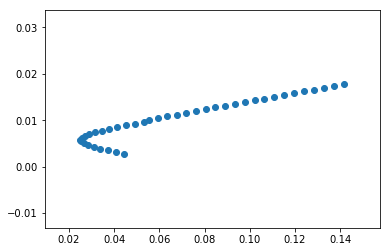

In [62]:
plt.scatter(efficientp[:,0], efficientp[:,1])

CML作图：
同理，都是构建目标回报率，然后再找出对应的方差，区别是，因为CML是直线，所以不需要minimize方程，SP都找到了，而SP就是线的斜率，所以直接用P做。因为
$$\frac{target~\mu^e}{target~\sigma}=\frac{R^e_{mve}}{\sigma_{mve}}$$
所以
$$targetsigma=\frac{targetmue}{R^e_{mve}}*{\sigma_mve}

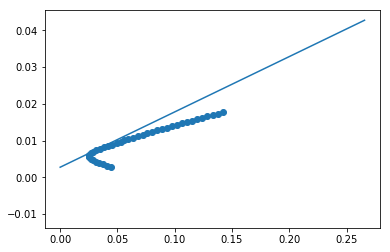

In [63]:
targetmue=np.linspace(0,0.04,20)
#设定目标超额回报率，
ERtemp=targetmue+Rf
STDtemp=targetmue/Remve * Stdmve

plt.scatter(efficientp[:,0], efficientp[:,1])  #MVE
plt.plot(STDtemp,ERtemp)                       #CAL